# Applied Algo Assigment -6 

This assignment has been done by shubham bipin kumar
The work in this assignment is solely mine

# Question1

In [ ]:
import pandas as pd
from scipy.stats import multivariate_normal
import numpy as np
import random
from scipy.spatial import distance

## Problem 1: Expectation-Maximization Algorithm for Clustering

In [ ]:
# Posterior probablity
def weights(mu, cov_mat, P, x, n_centre):
    U_mat = np.ones((x.shape[0],n_centre))
    for i in range(n_centre):
        U_mat[:,i] = multivariate_normal.pdf(x,mu[i],cov_mat[:,:,i], allow_singular=True)
    U_mat = U_mat*P/(U_mat @ P.T)
    return U_mat

# Maximization
def Maximization (W, cov_mat, X, n_centre):
    # mean
    mu1 = W.T @ X/np.sum(W,axis=0).reshape(-1,1)
    # covriance
    for i in range(n_centre):
        cov_mat[:,:,i] = (X - mu1[i]).T @ ((X - mu1[i]) * W[:,i].reshape(-1,1))/np.sum(W[:,i])
    # P step
    P_new = np.sum(W, axis = 0)/W.shape[0]
    P_new = P_new.reshape(1,-1)
    return mu1, P_new

# Initialization
def initalization(n_centre, data):
    # mean initialization
    mu = np.ones((n_centre, data.shape[1]))
    for i in range(n_centre):
        rand_val = random.randrange(0, data.shape[0])
        mu[i] = data[rand_val]

    # covariance initialization
    cov = np.identity(data.shape[1])
    cov_mat = np.dstack([cov]*n_centre)

    ## prob initializing
    P = np.ones((1,n_centre))*1/n_centre
    return mu, cov_mat, P


# EM algrithm
def EM_algo(data, n_centre):
    mu12 = []
    diff = 0
    diff_list = []
    mu, cov_mat, P = initalization(n_centre, data)
    iteration = 0
    while True:
        mu1 = np.copy(mu)
        W = weights(mu, cov_mat, P, data, n_centre )
        mu, P = Maximization(W, cov_mat,data, n_centre )
        for j in range(n_centre):
            diff += np.sum(distance1(mu1[j], mu[j]))  
        iteration += 1
        diff_list.append(diff)
        if diff < 1e-3:
            break
        else:
            diff = 0

    return iteration, mu, W, diff_list

# Distance function
def distance1(x,y):
    a = (x-y)**2
    return a



#### 1. Initializing each Gaussian:
Mean :  For initlializing the mean I am randomly selecting k data points for the k clusters from the data sets. The size of my mean matrix is k * D(dimesnsions)

Coviance : I am initializing it with D* D identity matrix for each cluster and I am stacking them to convert it into D * D * k matrix

Prior: Initialized by 1/k. For eg if k = 3 then each cluster would have 0.33 prior

#### 2. Deciding Ties:
The ties would happpen when we are assigning the data point to the actual cluster but the euclidien distance between the two cluster is the same. We could assign it based on which cluster has a higher probablity of the data points

#### 3.  Stopping criteria:
Once we initialize our mean, we keep on updating it based on posterior probablity. If the sum of squared difference between previous mean and the present iteration mean is smaller than episilon value which 0.001 then the algorithm stops

# Question 2

In the previous question, I wrote a function for weights (posterior probablity), maximization, initialization, EM_algo. Based on that, first I am hard assigning the data points to the respective cluster.

Once the assignment is done, I calculated the distance b/w the actual centroid and centroid coming from the EM. The one which have minimum distance that EM cluster is assigned to the actual cluster.

We run the EM algorithm for 20 iteration, for multiple value of K = (2,3,4,5) and plot the boxplot

### Ionosphere data

In [612]:
ionosphere =  pd.read_csv('ionosphere.data',header=None)

In [614]:
# actual cluster mean
grouped = ionosphere.groupby(34)
cluster_mean = grouped.mean().to_numpy()

#label
label = ionosphere[34]
ionosphere.drop([34], inplace= True, axis = 1)
ionosphere = ionosphere.to_numpy()

#### Error calculation

In [569]:
def error_rate(cluster_mean,mu,W,label):
    allocate={'b':[],'g':[]}
    predict_allocate = []
    count = 0

    # classifying the cluster
    predict= np.argmax(W, axis = 1)

    # allocating the cluster to original label
    for i in range(len(mu)):
        if np.sum(distance1(cluster_mean[0],mu[i])) < np.sum(distance1(cluster_mean[1],mu[i])):
            allocate['b'].append(i)
        else:
            allocate['g'].append(i)
    
    for i in predict:
        if i in allocate['b']:
            predict_allocate.append('b')
        else:
            predict_allocate.append('g')
            
    
    # checking the count of mislabelled 
    for i in range(len(label)):
        if label[i] != predict_allocate[i]:
            count+=1
  
    return count/len(label)
            


#### Running the EM algorithm

In [621]:
error_list = []
iteration_list = []

final_error = []
final_iteration_list = []


for n_centre in range(2,6):
    print("n_centre",n_centre)
    error_list = []
    iteration_list = []
    for i in range(20):
        print("iter",i)
        iteration, mu, W, diff_list = EM_algo(ionosphere, n_centre)
        iteration_list.append(iteration)

        error = error_rate(cluster_mean,mu,W,label)
        error_list.append(error)
        
    final_error.append(error_list)
    final_iteration_list.append(iteration_list)


n_centre 2
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14
iter 15
iter 16
iter 17
iter 18
iter 19
n_centre 3
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14
iter 15
iter 16
iter 17
iter 18
iter 19
n_centre 4
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14
iter 15
iter 16
iter 17
iter 18
iter 19
n_centre 5
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14
iter 15
iter 16
iter 17
iter 18
iter 19


#### Whisker plot

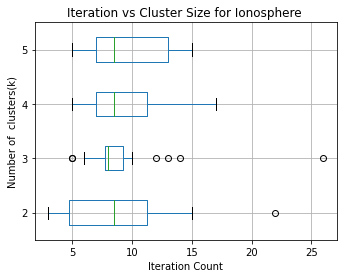

In [626]:
import matplotlib.pyplot as plt
df = pd.DataFrame(final_iteration_list, index=[i for i in range(2,6)])
df.T.boxplot(vert=False)
plt.subplots_adjust(left=0.2)
plt.title('Iteration vs Cluster Size for Ionosphere')
plt.xlabel("Iteration Count")
plt.ylabel("Number of  clusters(k)")
plt.show() 

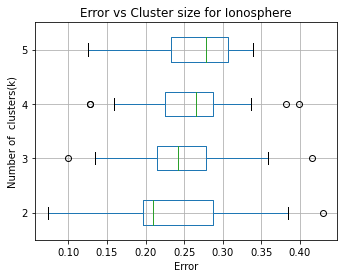

In [627]:
df = pd.DataFrame(final_error, index=[i for i in range(2,6)])
df.T.boxplot(vert=False)
plt.subplots_adjust(left=0.2)
plt.title('Error vs Cluster size for Ionosphere')
plt.xlabel("Error")
plt.ylabel("Number of  clusters(k)")
plt.show() 

### Ringnorm data

In [600]:
ringnorm =  pd.read_csv('Dataset.data',sep = "\s+",header=None)

In [601]:
# actual cluster mean
grouped = ringnorm.groupby(20)
cluster_mean = grouped.mean().to_numpy()

# label
label1 = ringnorm[20]
ringnorm.drop([20], inplace= True, axis = 1)
ringnorm = ringnorm.to_numpy()

label = []
for i in label1:
    if i == 0:
        label.append('b')
    else:
        label.append('g')

#### Running the EM algorithm       

In [605]:
error_list = []
iteration_list = []

final_error = []
final_iteration_list = []


for n_centre in range(2,6):
    print("n_centre",n_centre)
    error_list = []
    iteration_list = []
    for i in range(20):
        print("iter",i)
        iteration, mu, W, diff_list = EM_algo(ringnorm, n_centre)
        iteration_list.append(iteration)

        error = error_rate(cluster_mean,mu,W,label)
        error_list.append(error)
        
    final_error.append(error_list)
    final_iteration_list.append(iteration_list)


n_centre 2
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14
iter 15
iter 16
iter 17
iter 18
iter 19
n_centre 3
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14
iter 15
iter 16
iter 17
iter 18
iter 19
n_centre 4
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14
iter 15
iter 16
iter 17
iter 18
iter 19
n_centre 5
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
iter 10
iter 11
iter 12
iter 13
iter 14
iter 15
iter 16
iter 17
iter 18
iter 19


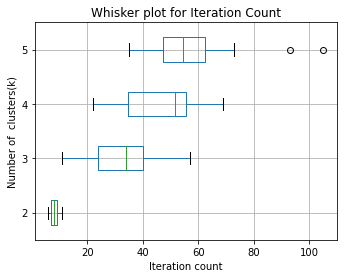

In [606]:
import matplotlib.pyplot as plt
df = pd.DataFrame(final_iteration_list, index=[i for i in range(2,6)])
df.T.boxplot(vert=False)
plt.subplots_adjust(left=0.2)
plt.title('Whisker plot for Iteration Count')
plt.xlabel("Iteration count")
plt.ylabel("Number of  clusters(k)")
plt.show() 

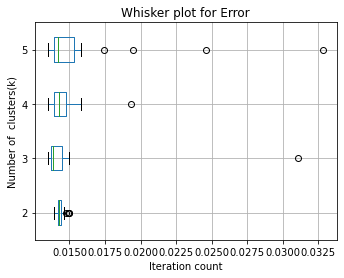

In [607]:
df = pd.DataFrame(final_error, index=[i for i in range(2,6)])
df.T.boxplot(vert=False)
plt.subplots_adjust(left=0.2)
plt.title('Whisker plot for Error')
plt.xlabel("Iteration count")
plt.ylabel("Number of  clusters(k)")
plt.show() 

# Problem 3: Algorithm Design

Problem 3.1
Given a text D and a pattern P, describe an Ω(d+p) time method for finding the longest prefix of P that is a substring of D. The lengths of D and P are d and p, respectively.

In [2]:
# KMP failure function
def compute_fail(P):
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    while j < m:
        if P[j] == P[k]:
            fail[j] = k + 1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k - 1]
        else:
            j += 1
    return fail


#KMP

def longest_prefix(T, P):
    n, m = len(T), len(P)
    if m == 0:
        return 0
    fail = compute_fail(P)
    max_len = 0
    value = ""
    new_val = {"max_len_prefix": "a"}
    #print (fail)
    j = 0
    k = 0
    while j < n:
        if T[j] == P[k]:
            if k == m-1:
                to_return = new_val["max_len_prefix"]
                #print(to_return)
                return new_val["max_len_prefix"]
            if max_len < k < len(P):
                max_len = k
                #print(P[0:k+1])
                new_val["max_len_prefix"] = P[0:k+1]
                to_return = new_val["max_len_prefix"]
                #print(to_return)
            j += 1
            k += 1
        elif k > 0:
            k = fail[k - 1]
        else:
            j += 1

    return new_val["max_len_prefix"]


if __name__ == "__main__":
    D = "AcdcdcabcdfcdcdcAAAAAcdcAAB"
    P = "abcdef"
    #P = "xyzbv"
    val = longest_prefix(D,P)
    if (val == "a"):
        print("no prefix matched with text")
    else:
        print("longest prefix that matched with text :", val)

longest prefix that matched with text : abcd


REPORT:- I have used modified KMP algorithm to find the longest prefix that is also a substring of the text. First we calculate all the prefix of the pattern and prepare a fail table .This takes Ω(p) . This table is used to find where to start in case of failure. we iterate through the text and find the matches and i'm storing the largest match that i'm getting everytime and finally returing the largest value of the prefix that is matching this take Ω(d) . so overall time complexity is Ω(d+p). 

# Problem 3.2
Given t an arbitrary integer we want to find,

x in X, y in Y, z in Z where X,Y,Z are of lists of length m,

such that t = x + y + z

in O(m2logm) time.

In [3]:
def binarySearch(arr, l, r, x):
    while l <= r:

        mid = l + (r - l) // 2

        if arr[mid] == x:
            return mid

        elif arr[mid] < x:
            l = mid + 1

        else:
            r = mid - 1

    return -1



def sum_of_no(arr1, arr2, arr3, sum):
    arr1.sort()
    #print(arr1)
    l1 = len(arr1)
    l2 = len(arr2)
    l3 = len(arr3)
    for i in range(l2):
        for j in range(l3):
            temp_sum = arr2[i] + arr3[j]
            index = binarySearch(arr1, 0, l1 -1 , (sum - temp_sum))
            #print(index)
            if index >= 0:
                return [arr1[index], arr2[i], arr3[j]]
            else:
                continue

    return -1




if __name__ == "__main__":
    arr1 = [3,4,5,6,2]
    arr2 = [11,15,16,18]
    arr3 = [3,13,17,45]
    #arr1.sort()
    #print(binarySearch(arr1, 0, len(arr1) - 1, 2))
    sum =65
    result = sum_of_no(arr1, arr2, arr3, sum)
    #print(result)
    if (len(result)) > 1:
        print("elements found in arr1: {} , arr2: {}, in arr3: {} to sum up {}".format(result[0],result[1],result[2],sum))
    else:
        print("elements not found")

elements found in arr1: 5 , arr2: 15, in arr3: 45 to sum up 65


REPORT- 2
we have three arrays . First we have sorted one array which takes O(m*logm) time . Now we are looping through both the arays and taking auxilary sum of values at corresponding indices and then finding the difference of sum and auxilary value in third array. looping through both the array takes O(m^2) time and binary search takes logm making the overall time complexity as O(m^2*logm)

# Problem 3.3 - Deleting a string from a compressed trie

Deleting a word from a compressed trie is relatively easy when compared to a regular trie. 

Beacause we have to conduct delete operation on at most one node

In [4]:
# citation - The code for Building trie from a list of words, is taken from
# https://github.com/bzamecnik/python-hash-trie/blob/master/hash_trie/hash_trie.py
#Algorithm to remove a word from the compressed trie is original and written by me

class Trie(object):
    def __init__(self, words, compressed=False):
        def uncompressed_from_list(words):
            'Creates a basic uncompressed trie from a sorted list of words.'
            root = ({}, False)
            for word in words:
                node, is_terminal = root
                size = len(word)
                for i, char in enumerate(word):
                    is_terminal = i == size - 1
                    if char not in node:
                        node[char] = ({}, is_terminal)
                    node, is_terminal = node[char]
            return root

        def compress_subtrie(root, prefix=''):
            children, is_terminal = root
            child_count = len(children)
            if child_count == 0:
                # not interesting, the base case
                return root, prefix
            elif child_count == 1:
                for key, child in children.items():
                    # just on iteration to obtain the single key-value pair
                    next_prefix = key if is_terminal else prefix + key
                    comp_child, comp_key = compress_subtrie(child, next_prefix)
                    comp_children = {comp_key: comp_child} \
                        if prefix == '' or is_terminal else comp_child[0]
                    return (comp_children, comp_child[1] or is_terminal), \
                           prefix if is_terminal else comp_key
            else:  # child_count > 1
                # not interesting, just compress each child
                comp_children = {}
                for key, child in children.items():
                    comp_child, comp_key = compress_subtrie(child, key)
                    comp_children[comp_key] = comp_child
                return (comp_children, is_terminal), prefix

        root = uncompressed_from_list(words)
        if compressed:
            root = compress_subtrie(root)[0]

        self.root = root
        self.is_compressed = compressed

    def __contains__(self, word):
        'Tests whether a given words is contained in the trie.'

        def in_trie(word, trie):
            children, is_terminal = trie
            word_length = len(word)
            if word_length == 0:
                return is_terminal
            for i in range(word_length if self.is_compressed else 1):
                key = word[:i + 1]
                child = children.get(key)
                if child is not None:
                    return in_trie(word[i + 1:], child)
            return False

        return in_trie(word, self.root)

    # -----Method to remove a word from the compressed Trie----------
    def remove_key(self, key):
        def remove(key, trie):
            children, is_terminal = trie
            word_len = len(key)
            if word_len == 0:
                return is_terminal
            for i in range(word_len if self.is_compressed else 1):
                keyword = key[:i + 1]
                child = children.get(keyword)
                if child is not None:
                    if len(child[0]) == 0:
                        del children[keyword]
                        return True
                    return remove(key[i + 1:], child)
            return False

        success = remove(key, self.root)
        if success:
            print('successfully deleted', key)
        else:
            print('key not found', key)

    def print_trie(self):
        def print_subtree(root, level):
            children, _ = root
            for key in sorted(children.keys()):
                child = children[key]
                _, is_terminal = child
                print(level * ('*' if is_terminal else '-'), key)
                print_subtree(child, level + 1)

        print_subtree(self.root, 1)

    def count_nodes(self, only_terminal=False):
        def _count_nodes(trie, only_terminal):
            children, is_terminal = trie
            if only_terminal:
                count = 1 if is_terminal else 0
            else:
                count = 1
            for _, child in children.items():
                count = count + _count_nodes(child, only_terminal)
            return count

        return _count_nodes(self.root, only_terminal)


def load_words(filename):
    with open(filename, 'r') as file:
        words = [word.strip() for word in file.readlines()]
    return words


if __name__ == '__main__':
    words = ['betty', 'has', 'some', 'butter', 'the', 'was', 'bitter']
    trie = Trie(words, True)
    print('Trie before deletion -')
    trie.print_trie()
    print('number of nodes in the trie', trie.count_nodes())
    print(trie.__contains__('butter'))
    print("")
    print("")
    print("")
    print('removing the word butter......')
    trie.remove_key('butter')
    print('Trie after deletion - ')
    trie.print_trie()
    print('total number of nodes', trie.count_nodes())
    print(trie.__contains__('butter'))



Trie before deletion -
- b
** etty
** itter
** utter
* has
* some
* the
* was
number of nodes in the trie 9
True



removing the word butter......
successfully deleted butter
Trie after deletion - 
- b
** etty
** itter
* has
* some
* the
* was
total number of nodes 8
False


REPORT-3 
we are Traversing the trie searching for the given string.If string is found, we check if the node has any children
We can delete the node if it is a terminal node i.e no children.The time complexity of creating as trie is (n*l) where n is number of words and l is average length of the word . the delete operation takes O(k) time where k is the length of the key to be deleted .The memory requirements of Trie is O(uniques alphbet * length_of_string* N) where N is number of keys in Trie

COMBINED REPORT:
#### 1. Initializing each Gaussian:
Mean :  For initlializing the mean I am randomly selecting k data points for the k clusters from the data sets. The size of my mean matrix is k * D(dimesnsions)

Coviance : I am initializing it with D* D identity matrix for each cluster and I am stacking them to convert it into D * D * k matrix

Prior: Initialized by 1/k. For eg if k = 3 then each cluster would have 0.33 prior

#### 2. Deciding Ties:
The ties would happpen when we are assigning the data point to the actual cluster but the euclidien distance between the two cluster is the same. We could assign it based on which cluster has a higher probablity of the data points

#### 3.  Stopping criteria:
Once we initialize our mean, we keep on updating it based on posterior probablity. If the sum of squared difference between previous mean and the present iteration mean is smaller than episilon value which 0.001 then the algorithm stops

In the previous question, I wrote a function for weights (posterior probablity), maximization, initialization, EM_algo. Based on that, first I am hard assigning the data points to the respective cluster.

Once the assignment is done, I calculated the distance b/w the actual centroid and centroid coming from the EM. The one which have minimum distance that EM cluster is assigned to the actual cluster.

We run the EM algorithm for 20 iteration, for multiple value of K = (2,3,4,5) and plot the boxplot




I have used modified KMP algorithm to find the longest prefix that is also a substring of the text. First we calculate all the prefix of the pattern and prepare a fail table .This takes Ω(p) . This table is used to find where to start in case of failure. we iterate through the text and find the matches and i'm storing the largest match that i'm getting everytime and finally returing the largest value of the prefix that is matching this take Ω(d) . so overall time complexity is Ω(d+p). 

we have three arrays . First we have sorted one array which takes O(m*logm) time . Now we are looping through both the arays and taking auxilary sum of values at corresponding indices and then finding the difference of sum and auxilary value in third array. looping through both the array takes O(m^2) time and binary search takes logm making the overall time complexity as O(m^2*logm)

we are Traversing the trie searching for the given string.If string is found, we check if the node has any children
We can delete the node if it is a terminal node i.e no children.The time complexity of creating as trie is (n*l) where n is number of words and l is average length of the word . the delete operation takes O(k) time where k is the length of the key to be deleted .The memory requirements of Trie is O(uniques alphbet * length_of_string* N) where N is number of keys in Trie
    